In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import random
import requests
import timeit
from bs4 import BeautifulSoup
import time
import pandas as pd
import seaborn as sns

In [2]:
ADDR = 'localhost'
PORT = 4000
CODES = Counter()
CODES2 = []

PHONES = ['IP12', 'IP13P', 'REA5', 'REAX2']

In [3]:
def get():
    r = requests.get("http://{}:{}".format(ADDR, PORT))
    html = BeautifulSoup(r.text)
    CODES[r.status_code] += 1
    CODES2.append(r.status_code)
    return r

def post():
    r = requests.post("http://{}:{}/add".format(ADDR, PORT), data={'quantity': 1, 'code': random.choice(PHONES)})
    CODES[r.status_code] += 1
    CODES2.append(r.status_code)
    return r
    
def static():
    r = requests.get("http://{}:{}/static/images/Iphone_13Pro.jpeg".format(ADDR, PORT))
    CODES[r.status_code] += 1
    CODES2.append(r.status_code)
    return r


# Test 1 Sprawdzenie czy zmieniają sie maszyny

In [4]:
counter = 0
result_list = list()
for i in range(100):
    r = get()
    html = BeautifulSoup(r.text)
    vm_name = html.title.text.split(":")[-1]
    result = {
        'vm_name': vm_name,
        'time': counter,
        'y': 1
    }
    result_list.append(result)
    counter = 2*i
    time.sleep(3)

In [5]:
df = pd.DataFrame(result_list)

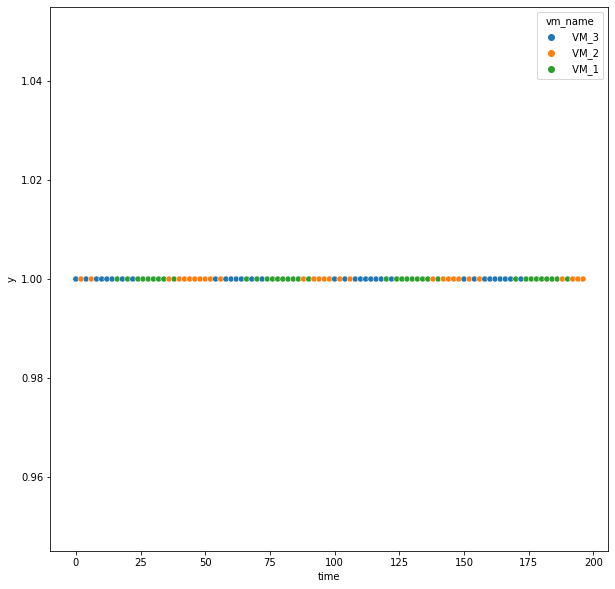

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='time', y='y', hue='vm_name', data=df) 
plt.show()